### LITTLE EYES V2
#### Meu Segundo Modelo de Visão Computacional

In [1]:
the_seed = 32
digit_size = (28, 28, 1)
convnn_acivation = 'relu'
fully_connected_acivation = 'tanh'
hyperparameter_max = 10
learning_rate = 0.001
max_epochs = 20
score_metric = 'accuracy'
verbose = 1

In [2]:
import tensorflow
from tensorflow.keras import datasets, layers, models, optimizers, Input, Model
from matplotlib import pyplot
import numpy
import pandas
import random

In [ ]:
random.seed(the_seed)
numpy.random.seed(the_seed)
tensorflow.random.set_seed(the_seed)

In [3]:
def create_litle_eyes(digit_size : tuple[int, int, int] = (28, 28, 1),
                      convnn_acivation : str = 'relu',
                      fully_connected_acivation : str = 'tanh',
                      net_name : str = 'LittleEyes',
                      hyperparameter : int = 1):
    # CAMADA OCULTA
    inputs = Input(shape=digit_size)

    # PRIMEIRA CAMADA CONVOLUCIONAL
    conv_2d_layer_1 = layers.Conv2D(2 * hyperparameter, (3, 3), activation = convnn_acivation)
    x = conv_2d_layer_1(inputs)

    # PRIMEIRA CAMADA MAX POOLING
    maxpool_1 = layers.MaxPooling2D((2, 2))
    x = maxpool_1(x)

    # SEGUNDA CAMADA CONVOLUCIONAL
    conv_2d_layer_2 = layers.Conv2D(4 * hyperparameter, (3, 3), activation = convnn_acivation)
    x = conv_2d_layer_2(x)

    # SEGUNDA CAMADA MAX POOLING
    maxpool_2 = layers.MaxPooling2D((2, 2))
    x = maxpool_2(x)

    # TERCEIRA CAMADA CONVOLUCIONAL
    conv_2d_layer_3 = layers.Conv2D(4 * hyperparameter, (3, 3), activation = convnn_acivation)
    x = conv_2d_layer_3(x)

    # TERCEIRA CAMADA MAX POOLING
    maxpool_3 = layers.MaxPooling2D((2, 2))
    x = maxpool_3(x)

    # FLATTEN
    flatten_layer = layers.Flatten()
    x = flatten_layer(x)

    # FULLY CONNECTED HIDDEN LAYER
    hidden_layer = layers.Dense(hyperparameter + 1, activation = fully_connected_acivation)
    x = hidden_layer(x)

    # OUTPUT LAYER
    output_layer = layers.Dense(10)
    outputs = output_layer(x)

    return Model(inputs = inputs, outputs = outputs, name = net_name)

In [4]:
(train_images, train_labels), (validation_images, validation_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, validation_images = train_images / 255.0, validation_images / 255.0

In [5]:
result_list = []

for hyperparameter in numpy.arange(1, hyperparameter_max + 1):
    net_name = f"LittleEyes_{hyperparameter}"
    print(f"{net_name} training started...")
    
    little_eyes = create_litle_eyes(net_name = net_name, 
                                    hyperparameter = hyperparameter)
    
    opt = optimizers.Adam(learning_rate = learning_rate)
    
    little_eyes.compile(optimizer=opt ,
                loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[score_metric])

    history = little_eyes.fit(train_images, train_labels, epochs = max_epochs, 
                        validation_data=(validation_images, validation_labels), verbose = verbose)
    
    training_score = history.history[score_metric][-1]
    validation_score = history.history[f"val_{score_metric}"][-1]
    
    result_list.append((net_name, hyperparameter, training_score, validation_score, little_eyes))
    print(f"{net_name.upper()}: {100 * training_score:.0f}% TRAINING {score_metric.upper()} / {100 * validation_score:.0f}% VALIDATION {score_metric.upper()}")

Epoch 1/20
1875/1875 [==============================] - 17s 9ms/step - loss: 1.7865 - accuracy: 0.3336 - val_loss: 1.4656 - val_accuracy: 0.4116
Epoch 2/20
1875/1875 [==============================] - 16s 8ms/step - loss: 1.4027 - accuracy: 0.4359 - val_loss: 1.3354 - val_accuracy: 0.4682
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 1.3242 - accuracy: 0.4672 - val_loss: 1.2788 - val_accuracy: 0.4859
Epoch 4/20
1875/1875 [==============================] - 18s 10ms/step - loss: 1.2755 - accuracy: 0.4954 - val_loss: 1.2334 - val_accuracy: 0.5157
Epoch 5/20
1875/1875 [==============================] - 17s 9ms/step - loss: 1.2300 - accuracy: 0.5250 - val_loss: 1.1849 - val_accuracy: 0.5442
Epoch 6/20
1875/1875 [==============================] - 17s 9ms/step - loss: 1.1807 - accuracy: 0.5533 - val_loss: 1.1385 - val_accuracy: 0.5672
Epoch 7/20
1875/1875 [==============================] - 17s 9ms/step - loss: 1.1403 - accuracy: 0.5706 - val_loss: 1.1010 - val_a

KeyboardInterrupt: 

In [ ]:
results = pandas.DataFrame.from_records(result_list)
results.columns = ["net_name", 'hyperparameter', score_metric, f"val_{score_metric}", "little_eyes"]
results.sort_values("val_accuracy", ascending = False)

,net_name,accuracy,val_accuracy,hyperparameter
0,LittleEyes_1,0.657567,0.6466,1
1,LittleEyes_2,0.899817,0.9046,2
2,LittleEyes_3,0.935450,0.9389,3
3,LittleEyes_4,0.953400,0.9415,4
4,LittleEyes_5,0.929883,0.9193,5


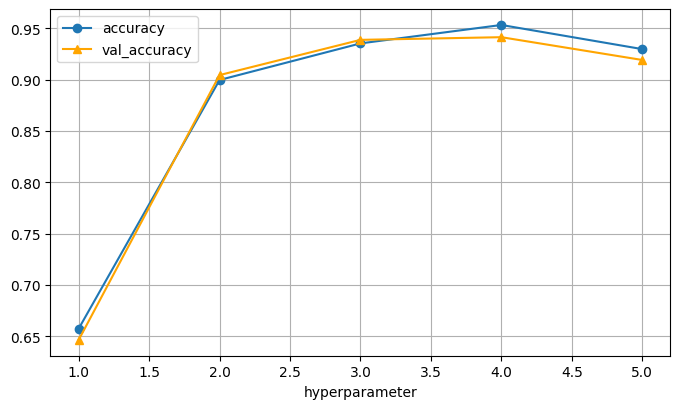

In [ ]:
fig = pyplot.figure(figsize = (8, 4.5))
ax = fig.add_subplot(111)
results.plot(x = 'hyperparameter', y = 'accuracy', marker = 'o', ax = ax)
results.plot(x = 'hyperparameter', y = 'val_accuracy', marker = '^', color = 'orange', ax = ax)
ax.grid()